In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
x=np.arange(-5.0,5.0, 0.1)
y=sigmoid(x)

Text(0.5, 1.0, 'Sigmoid Function')

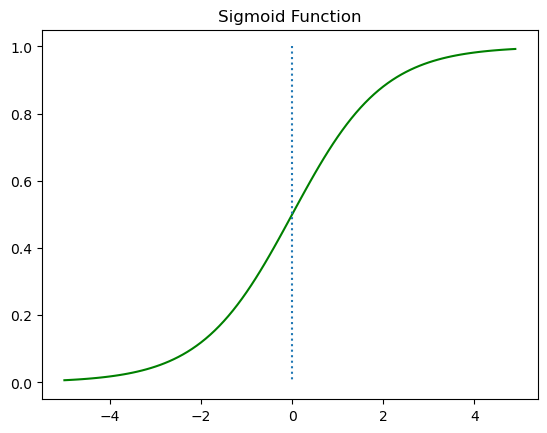

In [6]:
plt.plot(x,y,'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')

In [7]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

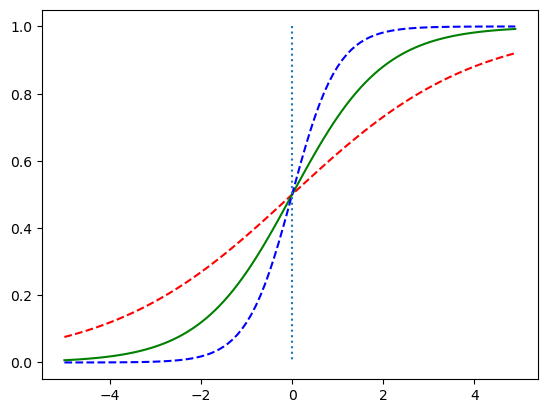

In [8]:
plt.plot(x,y1,'r', linestyle='--')
plt.plot(x,y2, 'g')
plt.plot(x,y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.show()

In [9]:
torch.manual_seed(1)
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [10]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros((1), requires_grad=True)

optimizer=optim.SGD([W, b], lr=0.1)
nb_epoch=1000
costs=[]

In [11]:
for epoch in range(nb_epoch):
    y=torch.sigmoid(x_train.matmul(W)+b)
    h=torch.sigmoid(y)

    cost=-(y_train*torch.log(h) + (1-y_train) * torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch % 100 == 0:
        print('Epoch : ',epoch, 'Cost : ',cost.item() )

Epoch :  0 Cost :  0.7240769863128662
Epoch :  100 Cost :  0.6750110983848572
Epoch :  200 Cost :  0.6532948613166809
Epoch :  300 Cost :  0.6423318982124329
Epoch :  400 Cost :  0.6356102824211121
Epoch :  500 Cost :  0.6308937072753906
Epoch :  600 Cost :  0.6272565722465515
Epoch :  700 Cost :  0.6242372393608093
Epoch :  800 Cost :  0.6215679049491882
Epoch :  900 Cost :  0.6190723180770874


In [12]:
h2=torch.sigmoid(x_train.matmul(W)+b)
print(h2)

tensor([[0.0702],
        [0.1021],
        [0.7316],
        [0.6198],
        [0.8606],
        [0.9833]], grad_fn=<SigmoidBackward0>)


In [13]:
prediction=h>=torch.FloatTensor([0.5])
print(prediction)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [14]:
import pandas as pd
s1=pd.Series(costs)
s1

0      0.724077
1      0.723253
2      0.722444
3      0.721652
4      0.720875
         ...   
995    0.616747
996    0.616722
997    0.616698
998    0.616673
999    0.616648
Length: 1000, dtype: float64

In [15]:
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(y_data)

In [17]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [18]:
model=BinaryClassifier()
optimizer=optim.SGD(model.parameters(), lr=0.01)


In [19]:
nb_epoch=2000
accuracy_list=[]
cost_list=[]

In [26]:
for epoch in range(nb_epoch):
    h=model(x_train)
    cost=F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    prediction=h>=torch.FloatTensor([0.5])
    correct_pred=prediction.float()==y_train
    accuracy=correct_pred.sum().item()/len(correct_pred)

    cost_list.append(cost.item())
    accuracy_list.append(accuracy)

    if epoch % 100 == 0:
        print('epoch : ',epoch, 'Cost : ',cost.item(), 'accuracy',accuracy)

epoch :  0 Cost :  0.1466585248708725 accuracy 1.0
epoch :  100 Cost :  0.1455848067998886 accuracy 1.0
epoch :  200 Cost :  0.144526869058609 accuracy 1.0
epoch :  300 Cost :  0.14348429441452026 accuracy 1.0
epoch :  400 Cost :  0.14245671033859253 accuracy 1.0
epoch :  500 Cost :  0.14144392311573029 accuracy 1.0
epoch :  600 Cost :  0.14044557511806488 accuracy 1.0
epoch :  700 Cost :  0.13946129381656647 accuracy 1.0
epoch :  800 Cost :  0.1384909301996231 accuracy 1.0
epoch :  900 Cost :  0.1375340223312378 accuracy 1.0
epoch :  1000 Cost :  0.13659043610095978 accuracy 1.0
epoch :  1100 Cost :  0.13565987348556519 accuracy 1.0
epoch :  1200 Cost :  0.13474202156066895 accuracy 1.0
epoch :  1300 Cost :  0.13383659720420837 accuracy 1.0
epoch :  1400 Cost :  0.13294349610805511 accuracy 1.0
epoch :  1500 Cost :  0.13206236064434052 accuracy 1.0
epoch :  1600 Cost :  0.13119296729564667 accuracy 1.0
epoch :  1700 Cost :  0.13033513724803925 accuracy 1.0
epoch :  1800 Cost :  0.1294

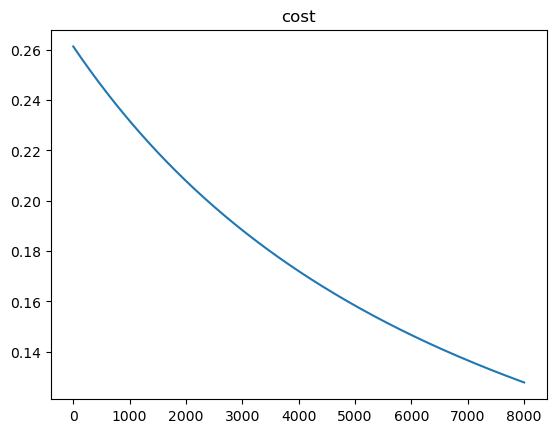

In [28]:
s1=pd.Series(cost_list)
plt.plot(s1)
plt.title("cost")
plt.show()

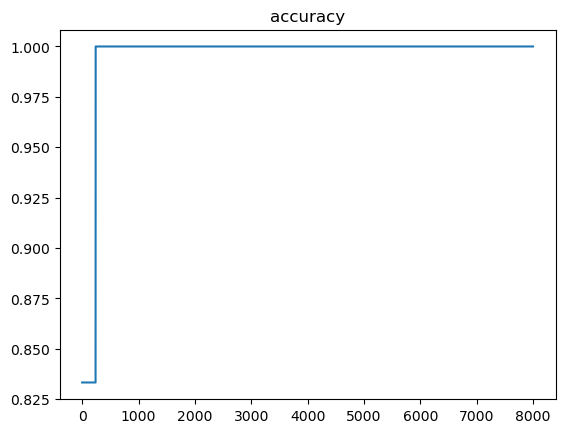

In [29]:
s2=pd.Series(accuracy_list)
plt.plot(s2)
plt.title('accuracy')
plt.show()